In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale = 1.3, rc = {'figure.figsize':(26,10)})
sns.set_palette('colorblind')

In [2]:
# all data
data = pd.read_csv('audio_features.csv')
data

,Unnamed: 0,Participant_id,Group,Question,Speech rate,Articulation rate,Pitch frequency,WER of the VSR model
0,0,0,human,presentation,3.0,5.0,132.61,0.0
1,1,0,human,hollidays,3.0,5.0,121.04,0.0
2,2,0,human,sports,4.0,6.0,127.38,0.0
3,3,0,human,music,3.0,6.0,127.33,0.0
4,4,0,human,cooking,3.0,6.0,132.79,0.0
...,...,...,...,...,...,...,...,...
95,95,9,robot,presentation,3.0,4.0,121.82,0.0
96,96,9,robot,hollidays,3.0,5.0,113.54,0.0
97,97,9,robot,sports,4.0,5.0,118.84,0.0
98,98,9,robot,music,3.0,4.0,117.67,0.0


In [3]:
data.insert(3, "First interlocutor", "human", allow_duplicates=False)
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data['Participant_id'] = data['Participant_id'] + 1

In [4]:
data

,Participant_id,Group,First interlocutor,Question,Speech rate,Articulation rate,Pitch frequency,WER of the VSR model
0,1,human,human,presentation,3.0,5.0,132.61,0.0
1,1,human,human,hollidays,3.0,5.0,121.04,0.0
2,1,human,human,sports,4.0,6.0,127.38,0.0
3,1,human,human,music,3.0,6.0,127.33,0.0
4,1,human,human,cooking,3.0,6.0,132.79,0.0
...,...,...,...,...,...,...,...,...
95,10,robot,human,presentation,3.0,4.0,121.82,0.0
96,10,robot,human,hollidays,3.0,5.0,113.54,0.0
97,10,robot,human,sports,4.0,5.0,118.84,0.0
98,10,robot,human,music,3.0,4.0,117.67,0.0


In [5]:
data['First interlocutor'] = np.where(data['Participant_id'] == 4, "robot", data['First interlocutor'])
data['First interlocutor'] = np.where(data['Participant_id'] == 5, "robot", data['First interlocutor'])
data['First interlocutor'] = np.where(data['Participant_id'] == 6, "robot", data['First interlocutor'])
data['First interlocutor'] = np.where(data['Participant_id'] == 7, "robot", data['First interlocutor'])
data['First interlocutor'] = np.where(data['Participant_id'] == 9, "robot", data['First interlocutor'])

data[data['Participant_id']==4]
#data

,Participant_id,Group,First interlocutor,Question,Speech rate,Articulation rate,Pitch frequency,WER of the VSR model
30,4,human,robot,presentation,3.0,5.0,129.99,0.0
31,4,human,robot,hollidays,3.0,5.0,124.55,0.0
32,4,human,robot,sports,3.0,5.0,136.78,0.0
33,4,human,robot,music,3.0,5.0,136.51,0.0
34,4,human,robot,cooking,3.0,6.0,153.96,0.0
35,4,robot,robot,presentation,3.0,5.0,121.42,0.0
36,4,robot,robot,hollidays,3.0,4.0,122.91,0.0
37,4,robot,robot,sports,3.0,4.0,121.69,0.0
38,4,robot,robot,music,3.0,4.0,117.70,0.0
39,4,robot,robot,cooking,3.0,5.0,134.85,0.0


In [202]:
df_h = data[(data["First interlocutor"] == "human")]
df_h = df_h.groupby(['Group', 'Participant_id'], as_index=False).mean() 
df_h

df_r = data[(data["First interlocutor"] == "robot")]
df_r = df_r.groupby(['Group', 'Question'], as_index=False).mean() 
df_r

,Group,Question,Participant_id,Speech rate,Articulation rate,Pitch frequency,WER of the VSR model
0,human,cooking,6.2,2.8,5.0,165.888,0.0
1,human,hollidays,6.2,3.0,4.6,136.224,0.0
2,human,music,6.2,2.8,4.4,145.372,0.0
3,human,presentation,6.2,2.8,4.6,137.606,0.0
4,human,sports,6.2,2.8,4.6,140.664,0.0
5,robot,cooking,6.2,2.8,4.8,142.422,0.0
6,robot,hollidays,6.2,2.4,4.0,133.740,0.0
7,robot,music,6.2,2.6,4.2,137.804,0.0
8,robot,presentation,6.2,2.6,4.2,137.966,0.0
9,robot,sports,6.2,2.8,4.2,139.262,0.0


In [9]:
import seaborn as sns
#y=df_h[df_h['Group']=="human"]['Speech rate'].counts()
#y=df_h.groupby(df_h['Group', 'Question'], as_index=False).mean() #['Speech rate']
#y

pal1 = sns.color_palette("deep", 2)
pal2 = sns.color_palette("deep")
pal2
#sns.countplot(data=df_h, x="Speech rate",  hue="Group", palette=[pal2[2],pal2[3]])#, data=gunquotes)

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

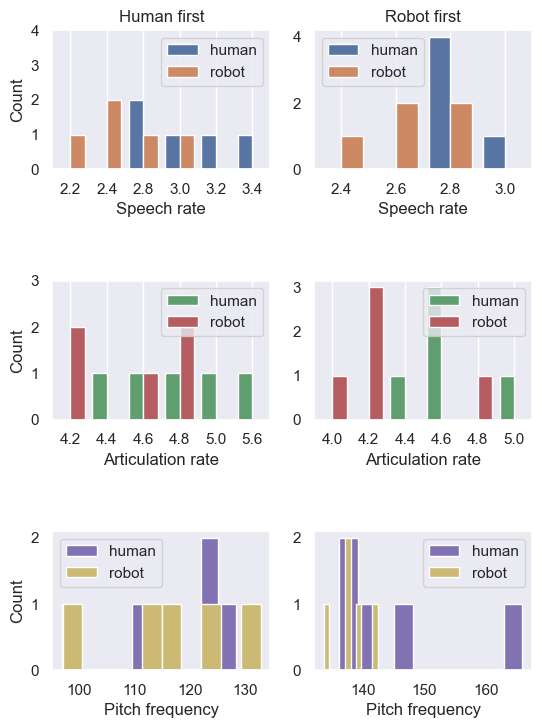

In [244]:
bins = 15
#sns.set()

plt.figure(figsize=[6,8])
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.8)

plt.subplot(321)
sns.countplot(data=df_h, x="Speech rate",  hue="Group", palette=[pal2[0],pal2[1]])
plt.ylabel('Count')
plt.ylim(0,4)
plt.xlabel('Speech rate')
plt.title("Human first")
plt.legend(loc='upper right')
plt.grid()

plt.subplot(322)
sns.countplot(data=df_r, x="Speech rate",  hue="Group", palette=[pal2[0],pal2[1]])
plt.ylabel('')
plt.xlabel('Speech rate')
plt.title("Robot first")
plt.legend(loc='upper left')
plt.grid()


plt.subplot(323)
sns.countplot(data=df_h, x="Articulation rate",  hue="Group", palette=[pal2[2],pal2[3]])
plt.ylabel('Count')
plt.ylim(0,3)
plt.xlabel('Articulation rate')
plt.legend(loc='upper right')
plt.grid()

plt.subplot(324)
sns.countplot(data=df_r, x="Articulation rate",  hue="Group", palette=[pal2[2],pal2[3]])
plt.ylabel('')
plt.xlabel('Articulation rate')
plt.legend(loc='upper right')
plt.grid()


plt.subplot(325)
x = df_h[df_h['Group']=="human"]
y = df_h[df_h['Group']=="robot"]
plt.hist(x['Pitch frequency'], bins=10, alpha=1, label='human', color=pal2[4])
plt.hist(y['Pitch frequency'], bins=10, alpha=1, label='robot', color=pal2[8])
plt.grid()
#sns.countplot(data=df_h, x="Pitch frequency",  hue="Group", palette=[pal2[4],pal2[8]])
plt.ylabel('Count')
plt.xlabel('Pitch frequency')
#plt.title("Human first")
plt.legend(loc='upper left')

plt.subplot(326)
x = df_r[df_r['Group']=="human"]
y = df_r[df_r['Group']=="robot"]
plt.hist(x['Pitch frequency'], bins=10, alpha=1, label='human', color=pal2[4])
plt.hist(y['Pitch frequency'], bins=10, alpha=1, label='robot', color=pal2[8])
plt.grid()
#sns.countplot(data=df_r, x="Pitch frequency",  hue="Group", palette=[pal2[4],pal2[8]])
plt.ylabel('')
plt.xlabel('Pitch frequency')
#plt.title("Robot first")
plt.legend(loc='upper right')


plt.show()

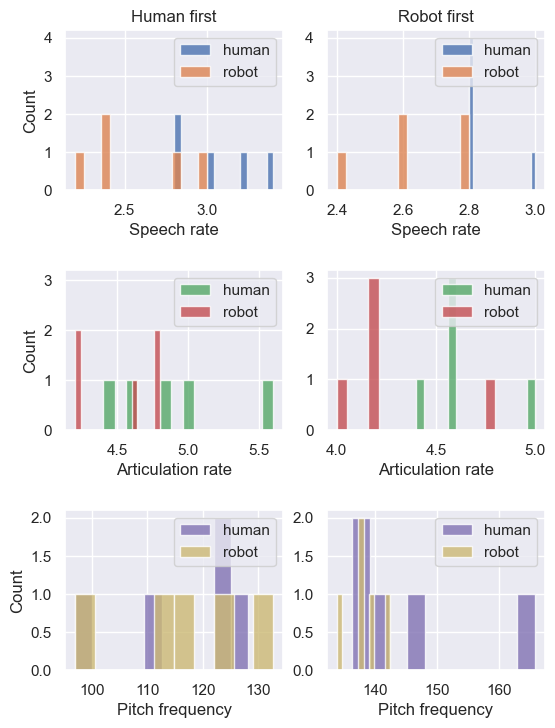

In [254]:
bins = 15
sns.set()

plt.figure(figsize=[6,8])
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.5)

plt.subplot(321)
x = df_h[df_h['Group']=="human"]
y = df_h[df_h['Group']=="robot"]
plt.hist(x['Speech rate'], bins, alpha=0.8, label='human', color=pal2[0])
plt.hist(y['Speech rate'], bins, alpha=0.8, label='robot', color=pal2[1])
plt.grid()
plt.ylabel('Count')
plt.ylim(0,4.2)
plt.xlabel('Speech rate')
plt.title("Human first")
plt.legend(loc='upper right')
plt.grid()

plt.subplot(322)
x = df_r[df_r['Group']=="human"]
y = df_r[df_r['Group']=="robot"]
plt.hist(x['Speech rate'], bins, alpha=0.8, label='human', color=pal2[0])
plt.hist(y['Speech rate'], bins, alpha=0.8, label='robot', color=pal2[1])
plt.grid()
plt.xlabel('Speech rate')
plt.title("Robot first")
plt.legend(loc='upper right')
plt.grid()


plt.subplot(323)
x = df_h[df_h['Group']=="human"]
y = df_h[df_h['Group']=="robot"]
plt.hist(x['Articulation rate'], bins, alpha=0.8, label='human', color=pal2[2])
plt.hist(y['Articulation rate'], bins, alpha=0.8, label='robot', color=pal2[3])
plt.grid()
plt.ylabel('Count')
plt.ylim(0,3.2)
plt.xlabel('Articulation rate')
plt.legend(loc='upper right')
plt.grid()

plt.subplot(324)
x = df_r[df_r['Group']=="human"]
y = df_r[df_r['Group']=="robot"]
plt.hist(x['Articulation rate'], bins, alpha=0.8, label='human', color=pal2[2])
plt.hist(y['Articulation rate'], bins, alpha=0.8, label='robot', color=pal2[3])
plt.grid()
plt.xlabel('Articulation rate')
plt.legend(loc='upper right')
plt.grid()


plt.subplot(325)
x = df_h[df_h['Group']=="human"]
y = df_h[df_h['Group']=="robot"]
plt.hist(x['Pitch frequency'], bins=10, alpha=0.8, label='human', color=pal2[4])
plt.hist(y['Pitch frequency'], bins=10, alpha=0.8, label='robot', color=pal2[8])
plt.grid()
plt.ylabel('Count')
plt.xlabel('Pitch frequency')
#plt.title("Human first")
plt.legend(loc='upper right')
plt.grid()

plt.subplot(326)
x = df_r[df_r['Group']=="human"]
y = df_r[df_r['Group']=="robot"]
plt.hist(x['Pitch frequency'], bins=10, alpha=0.8, label='human', color=pal2[4])
plt.hist(y['Pitch frequency'], bins=10, alpha=0.8, label='robot', color=pal2[8])
plt.grid()
plt.xlabel('Pitch frequency')
#plt.title("Robot first")
plt.legend(loc='upper right')
plt.grid()


plt.show()

C:\Users\eecha\AppData\Local\Temp\ipykernel_20864\358580905.py:130: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot2grid((5,3), (3,0))
C:\Users\eecha\AppData\Local\Temp\ipykernel_20864\358580905.py:142: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot2grid((5,3), (3,1))
C:\Users\eecha\AppData\Local\Temp\ipykernel_20864\358580905.py:154: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot2grid((5,3), (3,2))
C:\Users\eecha\AppData\Local\Temp\ipykernel_20864\358580905.py:168: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two mi

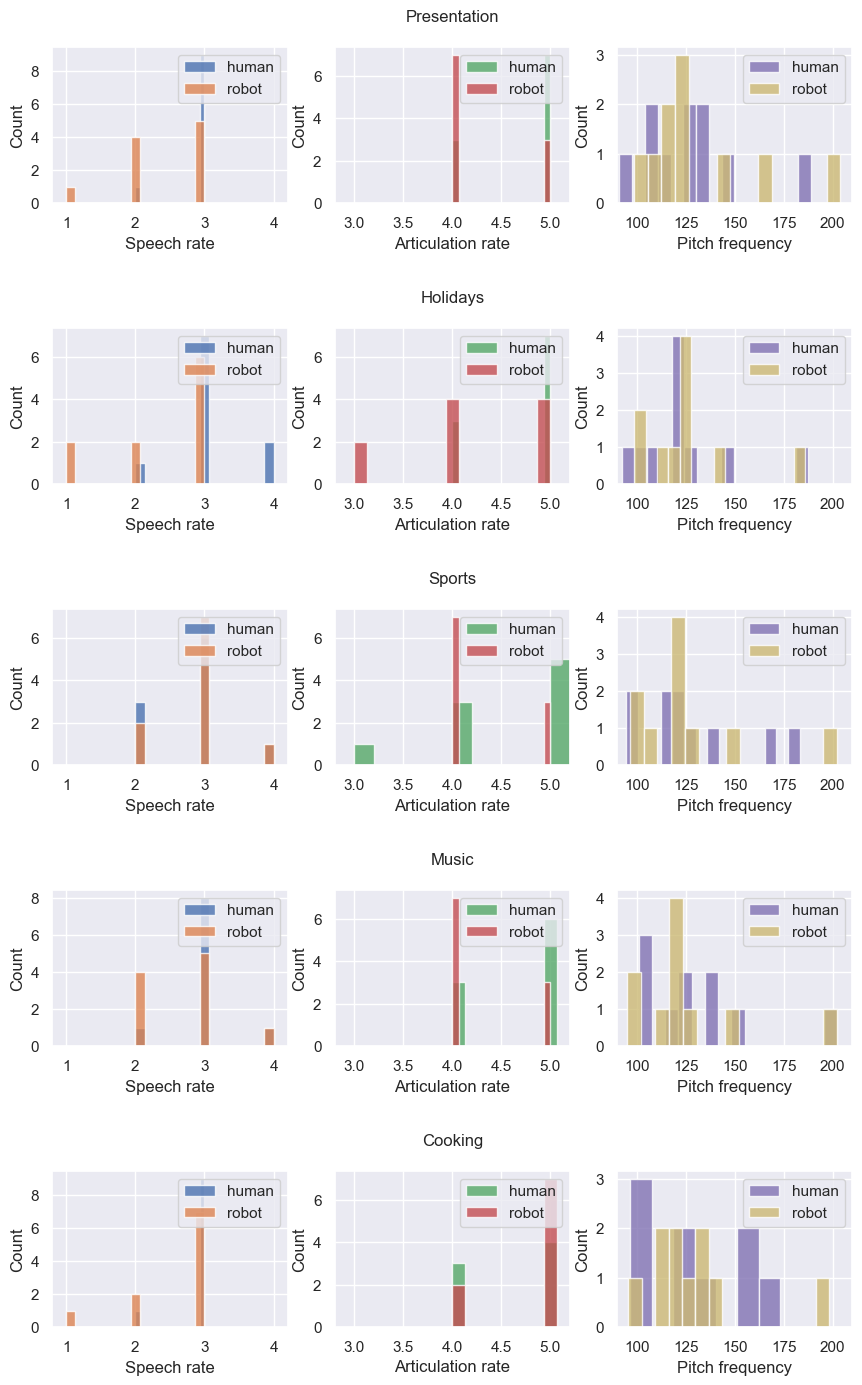

In [277]:
from matplotlib.gridspec import SubplotSpec

def create_subtitle(fig: plt.Figure, grid: SubplotSpec, title: str):
    "Sign sets of subplots with title"
    row = fig.add_subplot(grid)
    # the '\n' is important
    row.set_title(f'{title}\n') #, fontweight='semibold')
    # hide subplot
    row.set_frame_on(False)
    row.axis('off')

bins = 15

fig, axs = plt.subplots(5, 3, figsize=(10, 16))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.8)
grid = plt.GridSpec(5, 3)


plt.subplot(531)
x = data[(data['Group']=="human") & (data['Question']=="presentation")]
y = data[(data['Group']=="robot") & (data['Question']=="presentation")]
plt.hist(x['Speech rate'], bins, alpha=0.8, label='human', color=pal2[0])
plt.hist(y['Speech rate'], bins, alpha=0.8, label='robot', color=pal2[1])
plt.grid()
plt.ylabel('Count')
plt.xlabel('Speech rate')
plt.xlim(0.8, 4.2)
plt.legend(loc='upper right')
plt.grid()

plt.subplot(532)
x = data[(data['Group']=="human") & (data['Question']=="presentation")]
y = data[(data['Group']=="robot") & (data['Question']=="presentation")]
plt.hist(x['Articulation rate'], bins, alpha=0.8, label='human', color=pal2[2])
plt.hist(y['Articulation rate'], bins, alpha=0.8, label='robot', color=pal2[3])
plt.grid()
plt.ylabel('Count')
plt.xlabel('Articulation rate')
plt.xlim(2.8, 5.2)
plt.legend(loc='upper right')
plt.grid()

plt.subplot(533)
x = data[(data['Group']=="human") & (data['Question']=="presentation")]
y = data[(data['Group']=="robot") & (data['Question']=="presentation")]
plt.hist(x['Pitch frequency'], bins, alpha=0.8, label='human', color=pal2[4])
plt.hist(y['Pitch frequency'], bins, alpha=0.8, label='robot', color=pal2[8])
plt.grid()
plt.ylabel('Count')
plt.xlabel('Pitch frequency')
plt.xlim(90, 210)
plt.legend(loc='upper right')
plt.grid()


plt.subplot(534)
x = data[(data['Group']=="human") & (data['Question']=="hollidays")]
y = data[(data['Group']=="robot") & (data['Question']=="hollidays")]
plt.hist(x['Speech rate'], bins, alpha=0.8, label='human', color=pal2[0])
plt.hist(y['Speech rate'], bins, alpha=0.8, label='robot', color=pal2[1])
plt.grid()
plt.ylabel('Count')
plt.xlabel('Speech rate')
plt.xlim(0.8, 4.2)
plt.legend(loc='upper right')
plt.grid()

plt.subplot(535)
x = data[(data['Group']=="human") & (data['Question']=="hollidays")]
y = data[(data['Group']=="robot") & (data['Question']=="hollidays")]
plt.hist(x['Articulation rate'], bins, alpha=0.8, label='human', color=pal2[2])
plt.hist(y['Articulation rate'], bins, alpha=0.8, label='robot', color=pal2[3])
plt.grid()
plt.ylabel('Count')
plt.xlabel('Articulation rate')
plt.xlim(2.8, 5.2)
plt.legend(loc='upper right')
plt.grid()

plt.subplot(536)
x = data[(data['Group']=="human") & (data['Question']=="hollidays")]
y = data[(data['Group']=="robot") & (data['Question']=="hollidays")]
plt.hist(x['Pitch frequency'], bins, alpha=0.8, label='human', color=pal2[4])
plt.hist(y['Pitch frequency'], bins, alpha=0.8, label='robot', color=pal2[8])
plt.grid()
plt.ylabel('Count')
plt.xlabel('Pitch frequency')
plt.xlim(90, 210)
plt.legend(loc='upper right')
plt.grid()


plt.subplot(537)
x = data[(data['Group']=="human") & (data['Question']=="sports")]
y = data[(data['Group']=="robot") & (data['Question']=="sports")]
plt.hist(x['Speech rate'], bins, alpha=0.8, label='human', color=pal2[0])
plt.hist(y['Speech rate'], bins, alpha=0.8, label='robot', color=pal2[1])
plt.grid()
plt.ylabel('Count')
plt.xlabel('Speech rate')
plt.xlim(0.8, 4.2)
plt.legend(loc='upper right')
plt.grid()

plt.subplot(538)
x = data[(data['Group']=="human") & (data['Question']=="sports")]
y = data[(data['Group']=="robot") & (data['Question']=="sports")]
plt.hist(x['Articulation rate'], bins, alpha=0.8, label='human', color=pal2[2])
plt.hist(y['Articulation rate'], bins, alpha=0.8, label='robot', color=pal2[3])
plt.grid()
plt.ylabel('Count')
plt.xlabel('Articulation rate')
plt.xlim(2.8, 5.2)
plt.legend(loc='upper right')
plt.grid()

plt.subplot(539)
x = data[(data['Group']=="human") & (data['Question']=="sports")]
y = data[(data['Group']=="robot") & (data['Question']=="sports")]
plt.hist(x['Pitch frequency'], bins, alpha=0.8, label='human', color=pal2[4])
plt.hist(y['Pitch frequency'], bins, alpha=0.8, label='robot', color=pal2[8])
plt.grid()
plt.ylabel('Count')
plt.xlabel('Pitch frequency')
plt.xlim(90, 210)
plt.legend(loc='upper right')
plt.grid()


plt.subplot2grid((5,3), (3,0))
x = data[(data['Group']=="human") & (data['Question']=="music")]
y = data[(data['Group']=="robot") & (data['Question']=="music")]
plt.hist(x['Speech rate'], bins, alpha=0.8, label='human', color=pal2[0])
plt.hist(y['Speech rate'], bins, alpha=0.8, label='robot', color=pal2[1])
plt.grid()
plt.ylabel('Count')
plt.xlabel('Speech rate')
plt.xlim(0.8, 4.2)
plt.legend(loc='upper right')
plt.grid()

plt.subplot2grid((5,3), (3,1))
x = data[(data['Group']=="human") & (data['Question']=="music")]
y = data[(data['Group']=="robot") & (data['Question']=="music")]
plt.hist(x['Articulation rate'], bins, alpha=0.8, label='human', color=pal2[2])
plt.hist(y['Articulation rate'], bins, alpha=0.8, label='robot', color=pal2[3])
plt.grid()
plt.ylabel('Count')
plt.xlabel('Articulation rate')
plt.xlim(2.8, 5.2)
plt.legend(loc='upper right')
plt.grid()

plt.subplot2grid((5,3), (3,2))
x = data[(data['Group']=="human") & (data['Question']=="music")]
y = data[(data['Group']=="robot") & (data['Question']=="music")]
plt.hist(x['Pitch frequency'], bins, alpha=0.8, label='human', color=pal2[4])
plt.hist(y['Pitch frequency'], bins, alpha=0.8, label='robot', color=pal2[8])
plt.grid()
plt.ylabel('Count')
plt.xlabel('Pitch frequency')
plt.xlim(90, 210)
plt.legend(loc='upper right')
plt.grid()



plt.subplot2grid((5,3), (4,0))
x = data[(data['Group']=="human") & (data['Question']=="cooking")]
y = data[(data['Group']=="robot") & (data['Question']=="cooking")]
plt.hist(x['Speech rate'], bins, alpha=0.8, label='human', color=pal2[0])
plt.hist(y['Speech rate'], bins, alpha=0.8, label='robot', color=pal2[1])
plt.grid()
plt.ylabel('Count')
plt.xlabel('Speech rate')
plt.xlim(0.8, 4.2)
plt.legend(loc='upper right')
plt.grid()

plt.subplot2grid((5,3), (4,1))
x = data[(data['Group']=="human") & (data['Question']=="cooking")]
y = data[(data['Group']=="robot") & (data['Question']=="cooking")]
plt.hist(x['Articulation rate'], bins, alpha=0.8, label='human', color=pal2[2])
plt.hist(y['Articulation rate'], bins, alpha=0.8, label='robot', color=pal2[3])
plt.grid()
plt.ylabel('Count')
plt.xlabel('Articulation rate')
plt.xlim(2.8, 5.2)
plt.legend(loc='upper right')
plt.grid()

plt.subplot2grid((5,3), (4,2))
x = data[(data['Group']=="human") & (data['Question']=="cooking")]
y = data[(data['Group']=="robot") & (data['Question']=="cooking")]
plt.hist(x['Pitch frequency'], bins, alpha=0.8, label='human', color=pal2[4])
plt.hist(y['Pitch frequency'], bins, alpha=0.8, label='robot', color=pal2[8])
plt.grid()
plt.ylabel('Count')
plt.xlabel('Pitch frequency')
plt.xlim(90, 210)
plt.legend(loc='upper right')
plt.grid()


create_subtitle(fig, grid[0, 0:3], 'Presentation')
create_subtitle(fig, grid[1, 0:3], 'Holidays')
create_subtitle(fig, grid[2, 0:3], 'Sports')
create_subtitle(fig, grid[3, 0:3], 'Music')
create_subtitle(fig, grid[4, 0:3], 'Cooking')



In [6]:
# mean by participant by questions
mean = pd.read_csv('mean_audio_features.csv')
mean

,Participant_id,Group,Speech rate,Articulation rate,Pitch frequency,WER of the VSR model
0,0,human,3.2,5.6,128.230,0.0
1,0,robot,2.4,4.8,124.498,0.0
2,1,human,2.8,4.8,123.568,0.0
3,1,robot,2.2,4.2,132.710,0.0
4,2,human,2.8,4.4,110.280,0.0
5,2,robot,3.0,4.8,113.334,0.0
6,3,human,3.0,5.2,136.358,0.0
7,3,robot,3.0,4.4,123.714,0.0
8,4,human,2.2,4.6,153.468,0.0
9,4,robot,2.0,4.2,143.330,0.0


In [7]:
overall_mean = mean.groupby(['Group'], as_index=False).mean() 
overall_mean

,Group,Participant_id,Speech rate,Articulation rate,Pitch frequency,WER of the VSR model
0,human,4.5,2.94,4.76,130.9430,0.0
1,robot,4.5,2.60,4.40,127.6818,0.0


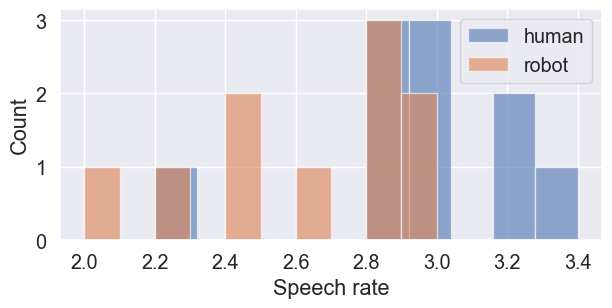

In [10]:
#mean.hist(column='Speech rate', by='Group') #(by='Group')
#mean['Speech rate'].groupby(by=['Group']).plot(kind = 'hist')
bins = 10

plt.figure(figsize=[7,3])
x = mean[mean['Group']=="human"]
y = mean[mean['Group']=="robot"]
plt.hist(x['Speech rate'], bins, alpha=0.6, label='human', color=pal2[0])
plt.hist(y['Speech rate'], bins, alpha=0.6, label='robot', color=pal2[1])
plt.grid()
plt.ylabel('Count')
plt.xlabel('Speech rate')
plt.legend(loc='upper right')
plt.grid()
plt.show()

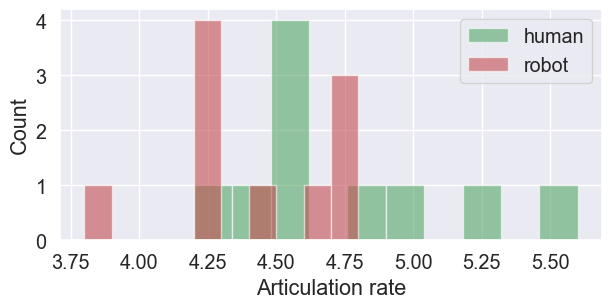

In [11]:
bins = 10

plt.figure(figsize=[7,3])
x = mean[mean['Group']=="human"]
y = mean[mean['Group']=="robot"]
plt.hist(x['Articulation rate'], bins, alpha=0.6, label='human', color=pal2[2])
plt.hist(y['Articulation rate'], bins, alpha=0.6, label='robot', color=pal2[3])
plt.grid()
plt.ylabel('Count')
plt.xlabel('Articulation rate')
plt.legend(loc='upper right')
plt.grid()
plt.show()

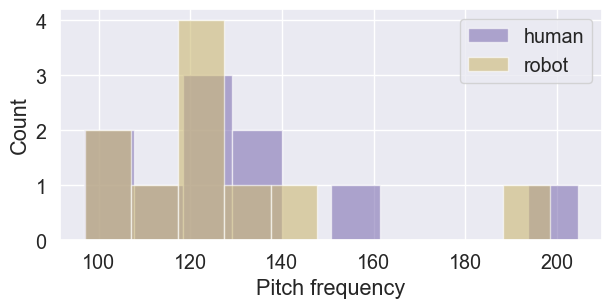

In [12]:
bins = 10

plt.figure(figsize=[7,3])
x = mean[mean['Group']=="human"]
y = mean[mean['Group']=="robot"]
plt.hist(x['Pitch frequency'], bins, alpha=0.6, label='human', color=pal2[4])
plt.hist(y['Pitch frequency'], bins, alpha=0.6, label='robot', color=pal2[8])
plt.grid()
plt.ylabel('Count')
plt.xlabel('Pitch frequency')
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [118]:
# mean by questions by group
mean_qu = pd.read_csv('stat_audio_features_per_questions.csv')
mean_qu

,Group,Question,Participant_id,Speech rate,Articulation rate,Pitch frequency,WER of the VSR model
0,human,cooking,4.5,2.9,5.0,141.268,0.0
1,human,hollidays,4.5,3.1,4.7,124.837,0.0
2,human,music,4.5,3.0,4.8,131.531,0.0
3,human,presentation,4.5,2.9,4.7,128.638,0.0
4,human,sports,4.5,2.8,4.6,128.441,0.0
5,robot,cooking,4.5,2.6,4.9,129.541,0.0
6,robot,hollidays,4.5,2.4,4.2,125.406,0.0
7,robot,music,4.5,2.7,4.3,125.971,0.0
8,robot,presentation,4.5,2.4,4.3,131.094,0.0
9,robot,sports,4.5,2.9,4.3,126.397,0.0


#### Mean number of information

In [26]:
h_pres = np.array([27, 37, 20, 24, 15, 23, 24, 32, 19, 18])
h_holidays = np.array([65, 24, 45, 38, 19, 39, 54, 51, 33, 47])
h_sport = np.array([51, 25, 19, 37, 20, 25, 21, 48, 25, 37])
h_music = np.array([56, 59, 26, 22, 29, 40, 28, 61, 30, 27])
h_cooking = np.array([59, 26, 71, 55, 150, 18, 36, 68, 9, 21])

In [27]:
r_pres = np.array([4, 17, 21, 28, 31, 14, 31, 21, 23, 19])
r_holidays = np.array([47, 10, 46, 19, 5, 15, 25, 28, 34, 11])
r_sports = np.array([54, 42, 20, 35, 12, 26, 38, 42, 43, 26])
r_music = np.array([15, 18, 32, 27, 13, 18, 28, 17, 22, 23])
r_cooking = np.array([47, 14, 51, 54, 72, 32, 8, 35, 11, 11])

In [28]:
print("pres, human: ", h_pres.mean(), " robot: ", r_pres.mean())
print("holidays, human: ", h_holidays.mean(), " robot: ", r_holidays.mean())
print("sports, human: ", h_sport.mean(), " robot: ", r_sports.mean())
print("music, human: ", h_music.mean(), " robot: ", r_music.mean())
print("cooking, human: ", h_cooking.mean(), " robot: ", r_cooking.mean())

pres, human:  23.9  robot:  20.9
holidays, human:  41.5  robot:  24.0
sports, human:  30.8  robot:  33.8
music, human:  37.8  robot:  21.3
cooking, human:  51.3  robot:  33.5
